In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
# Files to load
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

In [3]:
# Read in the data files
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [6]:
# Get the columns and rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# Another method of checking for null values
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
# Get the data types of the columns
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [15]:
# Get the unique values of the type of city
city_types = city_data_df['type'].unique()
city_types

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [17]:
# Create dictionary with city types and number of rides for each
dictTypesCount = {}
for c_type in city_types:
    dictTypesCount[c_type] = sum(city_data_df['type'] == c_type)
dictTypesCount

{'Urban': 66, 'Suburban': 36, 'Rural': 18}

In [18]:
# Get rows not null for ride data
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [19]:
# Double check for nulls
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [24]:
# Get data types for the columns
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [28]:
# Combine the data sets, appending the city data to the end of ride data using the left join on the 'city' column
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city', 'city'])
pyber_data_df.tail()

,city,date,fare,ride_id,driver_count,type
2370,Michaelberg,4/29/2019 17:04,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9018727594352,2,Rural
2372,North Jaime,2/10/2019 21:03,11.11,2781339863778,1,Rural
2373,West Heather,5/7/2019 19:22,44.94,4256853490277,4,Rural
2374,Newtonview,4/25/2019 10:20,55.84,9990581345298,1,Rural


In [29]:
# Create a DatFrame for the urban cities
urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908451377344,46,Urban


In [31]:
# Create DataFrames for suburban and rural
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/2019 11:13,43.22,1076079536213,9,Rural
2251,North Holly,2/2/2019 14:54,12.42,1985256326182,8,Rural
2252,Michaelberg,3/27/2019 18:27,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2/23/2019 21:12,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,5/6/2019 8:57,51.80,4018025271936,2,Rural


In [32]:
# Get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [33]:
# Get the ride count for suburban and rural
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [34]:
# Get the average fare for each individual city of each type
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']
urban_avg_fare.head()


city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [35]:
# Get the number of drivers for each city of each type
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

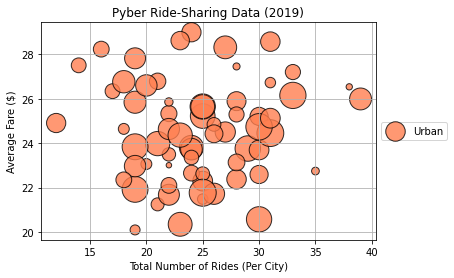

In [49]:
# Build the scatter plot for urban cities
plt.scatter(urban_ride_count, urban_avg_fare, 
            s=urban_driver_count * 10, 
            c='coral',
            edgecolor='black',
            linewidths=1,
            alpha=0.8,
            label='Urban')
plt.title('Pyber Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, .5))

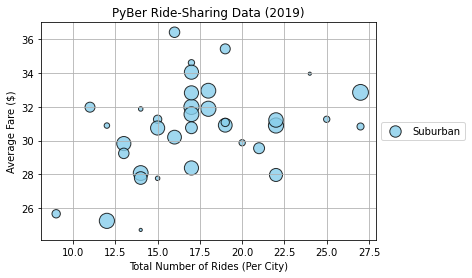

In [50]:
# Build the scatter plot for suburban cities
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, .5))

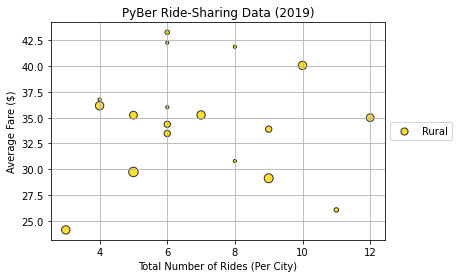

In [51]:
# Build the scatter plot for rural cities
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, .5))

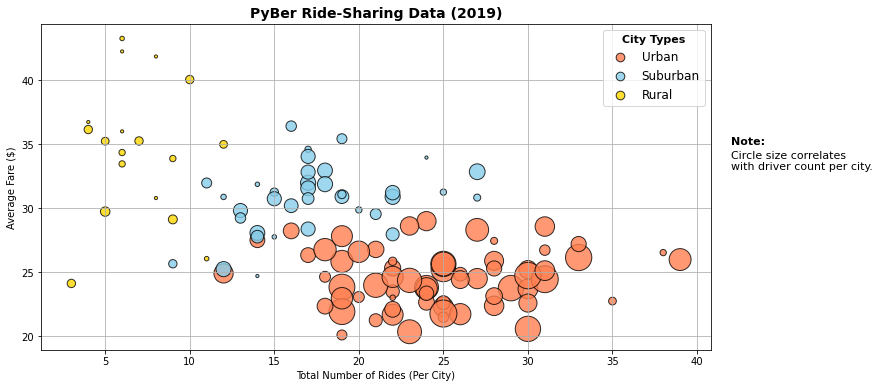

In [92]:
# Build the scatter plot for all three city types
plt.subplots(figsize=(12, 6))
# Urban
plt.scatter(urban_ride_count, urban_avg_fare, 
            s=urban_driver_count * 10, 
            c='coral',
            edgecolor='black',
            linewidths=1,
            alpha=0.8,
            label='Urban')

#Subunban
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

# Rural
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Add the trimmings
plt.title("PyBer Ride-Sharing Data (2019)", fontdict={'weight' : 'bold', 'size' : '14'})
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Create a legend, and standardize the marker sizes
lgnd = plt.legend(fontsize="12", mode="Expanded",
                  scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(11)
lgnd.get_title().set_fontweight('bold')

# Add a note to inform the viewer about marker sizes on the plot
plt.text(42, 35, 'Note:', fontsize='11', fontweight='bold')
plt.text(42, 33, '\nCircle size correlates\nwith driver count per city.', fontsize='11')

# Save the figure in an image file
plt.savefig('Analysis/Fig1.png', bbox_inches='tight')

# show the combined plot
plt.show()

